In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 1000)

In [3]:
def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

In [4]:
results = pd.read_csv('exported_data/HighDensity2kr-scalars.csv', converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray,
})

In [5]:
scalars = results[(results.type == 'scalar') | ((results.type == 'itervar') & (results.attrname != 'TO'))]
scalars = scalars.assign(qname = scalars.attrname.combine_first(scalars.module + '.' + scalars.name))
scalars.value = scalars.value.combine_first(scalars.attrvalue.astype('float64'))
scalars_wide = scalars.pivot_table(index=['run'], columns='qname', values='value')
scalars_wide['coveredUsersMean'] = scalars_wide.groupby(['D', 'R', 'T', 'm'])['Floorplan.coveredUsers:sum'].transform('mean')
scalars_wide['coveredUsersResidual'] = scalars_wide['Floorplan.coveredUsers:sum'] - scalars_wide['coveredUsersMean']

In [7]:
scalars_wide

qname,D,Floorplan.activityTime:last,Floorplan.collisions:sum,Floorplan.coveredUsers:sum,Floorplan.msgsPerSlot:sum,Floorplan.reachedUsers:sum,Floorplan.totalCollisions:sum,R,T,m,coveredUsersMean,coveredUsersResidual
run,,,,,,,,,,,,
HighDensity2kr-0-20210130-15:40:13-4396,1.0,42.0,239.0,290.0,133.0,1949.0,625.0,10.0,1.0,1.0,387.3,-97.3
HighDensity2kr-1-20210130-15:40:14-4396,1.0,39.0,377.0,374.0,206.0,2893.0,967.0,10.0,1.0,1.0,387.3,-13.3
HighDensity2kr-10-20210130-15:40:15-4396,1.0,11.0,679.0,412.0,196.0,22112.0,6600.0,30.0,1.0,1.0,361.0,51.0
HighDensity2kr-100-20210130-15:40:38-4396,1.0,101.0,658.0,493.0,466.0,6618.0,1703.0,10.0,5.0,5.0,492.0,1.0
HighDensity2kr-101-20210130-15:40:38-4396,1.0,100.0,646.0,494.0,465.0,6496.0,1641.0,10.0,5.0,5.0,492.0,2.0
HighDensity2kr-102-20210130-15:40:39-4396,1.0,82.0,636.0,496.0,464.0,6520.0,1698.0,10.0,5.0,5.0,492.0,4.0
HighDensity2kr-103-20210130-15:40:39-4396,1.0,105.0,602.0,493.0,468.0,6544.0,1606.0,10.0,5.0,5.0,492.0,1.0
HighDensity2kr-104-20210130-15:40:39-4396,1.0,96.0,637.0,487.0,458.0,6388.0,1667.0,10.0,5.0,5.0,492.0,-5.0
HighDensity2kr-105-20210130-15:40:40-4396,1.0,93.0,644.0,487.0,455.0,6472.0,1730.0,10.0,5.0,5.0,492.0,-5.0


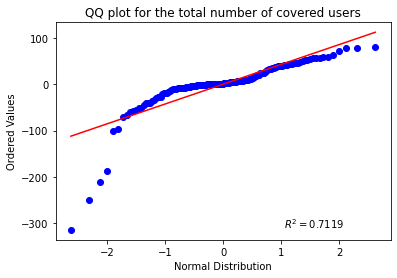

In [6]:
residuals = scalars_wide['coveredUsersResidual'].tolist()
qqplot = stats.probplot(residuals, dist='norm', plot=plt, rvalue=True)
plt.title("QQ plot for the total number of covered users")
plt.xlabel("Normal Distribution")
plt.show()

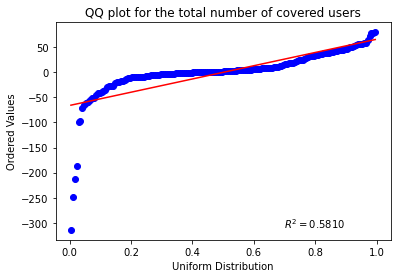

In [8]:
qqplotuniform = stats.probplot(residuals, dist='uniform', plot=plt, rvalue=True)
plt.title("QQ plot for the total number of covered users")
plt.xlabel("Uniform Distribution")
plt.show()